***Hilal Durmaz -HW2***

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
    
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
        
X2: Gender (1 = male; 2 = female).
    
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
    
X4: Marital status (1 = married; 2 = single; 3 = others).
    
X5: Age (year).
    
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
            
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
    
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set()
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

In [8]:
df = pd.read_excel('credit_card_clients.xls',header=1,)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.info()  #I checked if there is a missing value in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [11]:
df.drop(['ID'], inplace=True, axis=1)

In [12]:
df.rename(columns={'default payment next month':'target'}, inplace=True) #Rename these target

In [13]:
# Let's see some of the major statistical characteristics of the attributes:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


target
0    23364
1     6636
dtype: int64


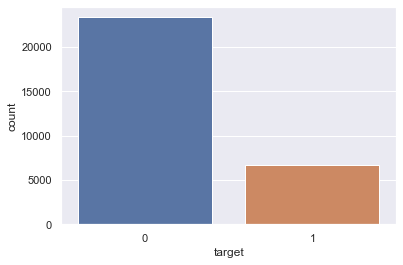

In [13]:
# Class distribution
print(df.groupby('target').size()) 

sns.countplot(df['target'],label="Count"); # Frequency of target

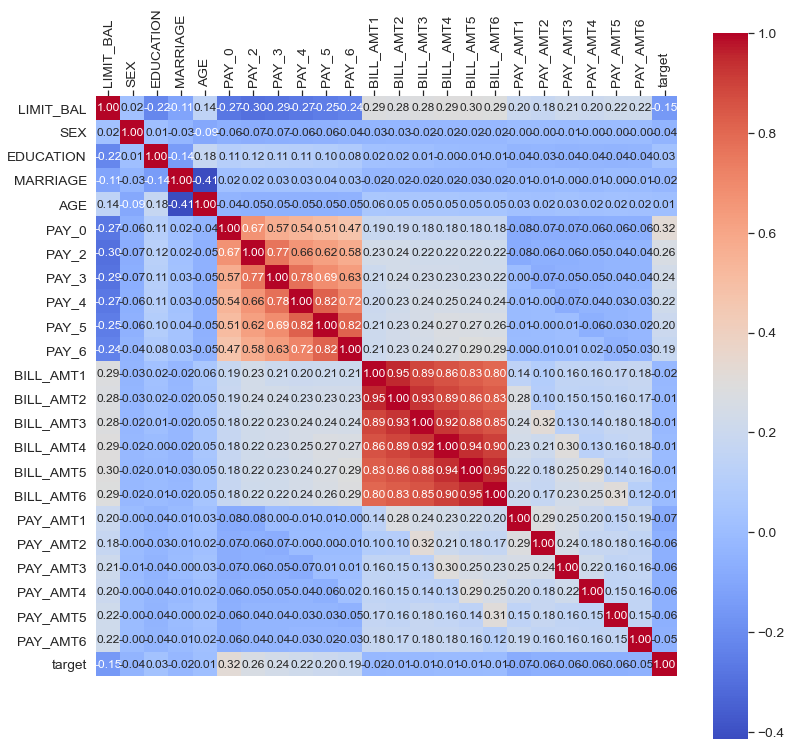

In [14]:
# Correlation table
sns.set(font_scale = 1.25)
correlation_matrix = df.corr()
plt.figure(figsize=(13,13))
ax = sns.heatmap(correlation_matrix, vmax=1, cbar=True, square=True, annot=True, fmt='.2f', 
                 annot_kws={'size': 12}, cmap='coolwarm')
ax.xaxis.set_ticks_position('top')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

There is high correlation in bill amount features and pay situations

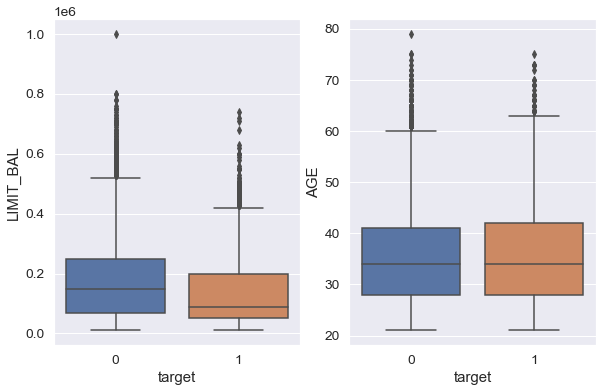

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x='target', y='LIMIT_BAL', data=df)
plt.subplot(1,3,2)
sns.boxplot(x='target', y='AGE', data=df)
plt.show()

There is no significant difference between limit balance and age in terms of target

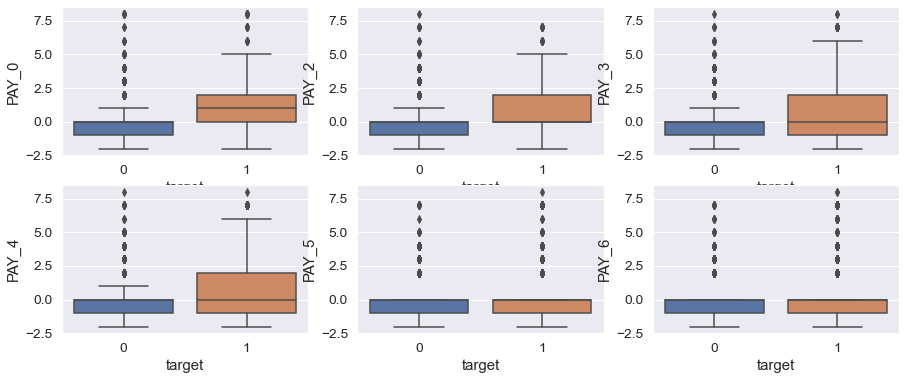

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
sns.boxplot(x='target', y='PAY_0', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='target', y='PAY_2', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='target', y='PAY_3', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='target', y='PAY_4', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='target', y='PAY_5', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='target', y='PAY_6', data=df)
plt.show()

There is a difference in pay situation but it is look likes there are very outliers 

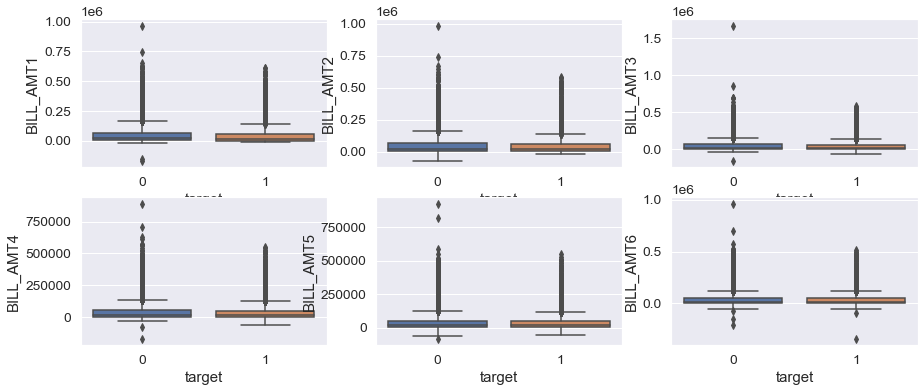

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
sns.boxplot(x='target', y='BILL_AMT1', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='target', y='BILL_AMT2', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='target', y='BILL_AMT3', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='target', y='BILL_AMT4', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='target', y='BILL_AMT5', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='target', y='BILL_AMT6', data=df)
plt.show()

There is no difference in bill amount features 

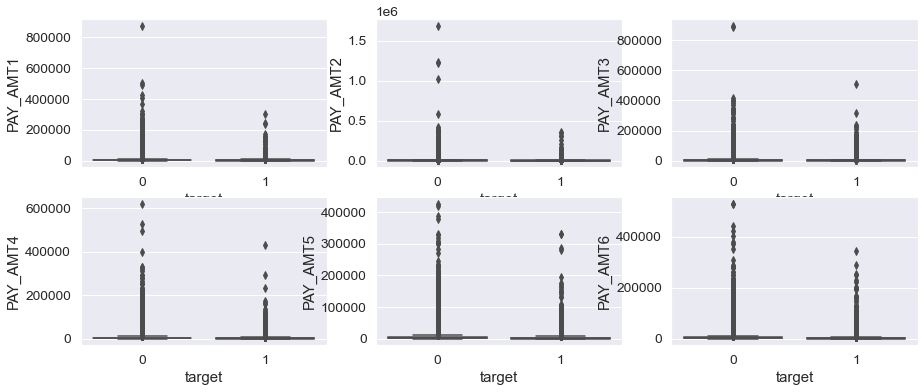

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
sns.boxplot(x='target', y='PAY_AMT1', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='target', y='PAY_AMT2', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='target', y='PAY_AMT3', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='target', y='PAY_AMT4', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='target', y='PAY_AMT5', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='target', y='PAY_AMT6', data=df)
plt.show()

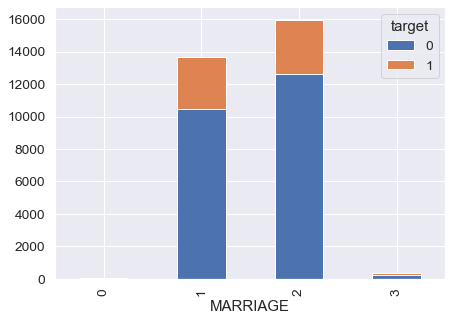

In [23]:
marriage_table = pd.crosstab(index=df['MARRIAGE'],columns=df['target'])
marriage_table.plot(kind='bar', stacked=True, figsize=(7,5));

Marital status (1 = married; 2 = single; 3 = others).
Data includes mostly married and single persons.However, being married or single does not affect the person's credit delays.


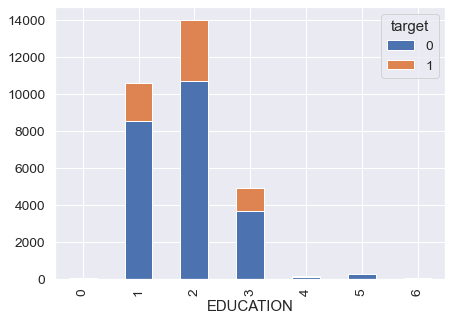

In [24]:
edu_table = pd.crosstab(index=df['EDUCATION'],columns=df['target'])
edu_table.plot(kind='bar', stacked=True, figsize=(7,5));

1 = graduate school; 2 = university; 3 = high school; 4 = others

There is no explanation for 5 in the feature descriptions.However, as we can see in the graphic, there are people with an education level of 5.There seems to be a relationship between educational status and target

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [17]:
#I am changing the types of features because we will ask for these features not to scale for logistic regression.
df.SEX = df.SEX.astype('category')
df.EDUCATION = df.EDUCATION.astype('category')
df.MARRIAGE = df.MARRIAGE.astype('category')
df.PAY_0 = df.PAY_0.astype('category')
df.PAY_2 = df.PAY_2.astype('category')
df.PAY_3 = df.PAY_3.astype('category')
df.PAY_4 = df.PAY_4.astype('category')
df.PAY_5 = df.PAY_5.astype('category')
df.PAY_6 = df.PAY_6.astype('category')

In [182]:
from sklearn import model_selection
seed = 42 # for reproducibility
train, test = model_selection.train_test_split(df, test_size=0.33, random_state=seed, stratify=df['target'])

In [183]:
y_train = train['target']
X_train = train.drop('target', axis=1)
y_test = test['target']
X_test = test.drop('target', axis=1)
print('X_train and y_train:', X_train.shape, y_train.shape)
print('X_test and y_test  :', X_test.shape, y_test.shape)

X_train and y_train: (20100, 23) (20100,)
X_test and y_test  : (9900, 23) (9900,)


In [186]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
# define the transformer for numerical variables
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])

# list of numerical features in the data set
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

# define the preprocessor to scale numerical variables and leave categorical ones untouched
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # let anything non-numerical pass through

In [187]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('preprocessor', preprocessor),
                     ('clf', LogisticRegression(multi_class='auto', random_state=seed)) ])

params = [{'clf__C'      : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty': ['l1'], 
           'clf__solver' : ['liblinear', 'saga']},
          
          {'clf__C'      : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty': ['l2'], 
           'clf__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
         ]

kfold = StratifiedKFold(n_splits = 5, random_state = seed) # train/validation with the same ratio of classes
grid = GridSearchCV(pipeline, param_grid = params, cv = kfold,scoring='f1', verbose = 1, n_jobs = -1)

In [188]:
# Run the grid search 
grid.fit(X_train, y_train)
print(grid.best_estimator_,'\n')

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed: 17.1min finished


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['LIMIT_BAL', 'SEX', 'AGE',
                                                   'PAY_0', 'PAY_2', 'PAY_3',
                          

In [189]:
from sklearn.metrics import f1_score

In [190]:
y_pred=grid.predict(X_test)

In [191]:
y_pred=grid.predict(X_test)
print('Best parameters  :', grid.best_params_)
print('\nTraining accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', grid.score(X_test, y_test))
print('f1 score    :', f1_score(y_test, y_pred, average=None))

Best parameters  : {'clf__C': 1.5500000000000005, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Training accuracy: 0.37738351848781293
Test accuracy    : 0.36081081081081084
f1 score    : [0.88764846 0.36081081]


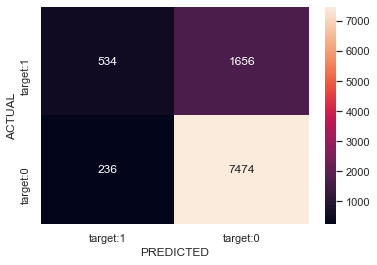


               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7710
           1       0.69      0.24      0.36      2190

    accuracy                           0.81      9900
   macro avg       0.76      0.61      0.62      9900
weighted avg       0.79      0.81      0.77      9900



In [192]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["target:1", "target:0"] , 
                yticklabels = ["target:1", "target:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

***Use the following classifiers with their defaults***

In [193]:
#  data must be int, float or bool fro XGBOOST  

df.SEX = df.SEX.astype('int')
df.EDUCATION = df.EDUCATION.astype('int')
df.MARRIAGE = df.MARRIAGE.astype('int')
df.PAY_0 = df.PAY_0.astype('int')
df.PAY_2 = df.PAY_2.astype('int')
df.PAY_3 = df.PAY_3.astype('int')
df.PAY_4 = df.PAY_4.astype('int')
df.PAY_5 = df.PAY_5.astype('int')
df.PAY_6 = df.PAY_6.astype('int')

In [194]:
df2=df.copy()

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

In [195]:
df2.SEX.unique()

array([2, 1])

In [196]:
df2['SEX']= df2['SEX'].map({2:0,1:1})  # I made it binary

In [197]:
cols_to_transform = ['EDUCATION','MARRIAGE'] # make a list if more than one column
df3 = pd.get_dummies(df2, columns = cols_to_transform, drop_first=True)

In [198]:
df3.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,target,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,0,0,0,1,0,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,1,0,1,0,0,0,0,0,1,0
2,90000,0,34,0,0,0,0,0,0,29239,...,0,0,1,0,0,0,0,0,1,0
3,50000,0,37,0,0,0,0,0,0,46990,...,0,0,1,0,0,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,0,1,0,0,0,0,1,0,0


In [199]:
seed = 42 # for reproducibility
train, test = model_selection.train_test_split(df3, test_size=0.33, random_state=seed, stratify=df['target'])

In [200]:
y_train = train['target']
X_train = train.drop('target', axis=1)
y_test = test['target']
X_test = test.drop('target', axis=1)
print('X_train and y_train:', X_train.shape, y_train.shape)
print('X_test and y_test  :', X_test.shape, y_test.shape)

X_train and y_train: (20100, 30) (20100,)
X_test and y_test  : (9900, 30) (9900,)


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
tree = DecisionTreeClassifier(random_state=seed)
models = [
    ['DecisionTree', DecisionTreeClassifier(random_state=seed)], 
    ['RandomForest', RandomForestClassifier(n_estimators=100, random_state=seed)], 
    ['ExtraTrees', ExtraTreesClassifier(n_estimators=100, random_state=seed)],
    ['BaggingClassifier', BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=seed)],
    ['AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=seed)], 
    ['GradientBoosting', GradientBoostingClassifier(random_state=seed)],
    ['XGBoost', XGBClassifier(seed=seed)],
    ]

In [202]:
# Use the following classifiers with their defaults
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print( "Classifer:" + abbrv + str(f1_score(y_test, y_pred, average=None)))

Classifer:DecisionTree[0.82059344 0.39576439]
Classifer:RandomForest[0.88774762 0.46689895]
Classifer:ExtraTrees[0.88301331 0.45498714]
Classifer:BaggingClassifier[0.88628701 0.46802409]
Classifer:AdaBoost[0.88906354 0.43694385]
Classifer:GradientBoosting[0.89002745 0.47048458]
Classifer:XGBoost[0.8866471  0.46167247]


I ran the models with default values. I examined the models that gave the best f1 result.

***RANDOM FOREST***



num-of-trees  CV-mean-score  Train-score
  20          0.454          0.452
  50          0.468          0.459
 100          0.471          0.467
 150          0.474          0.467
 200          0.473          0.467
 400          0.480          0.470


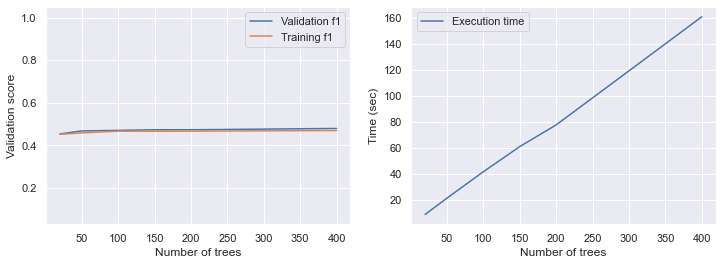

In [203]:
import time
clf = RF(random_state=seed)
n_estimators = [20, 50, 100, 150,200,400]
cv_scores = [] ; train_scores = [] ; exectime = []
print('num-of-trees  CV-mean-score  Train-score')

for i in n_estimators:
    clf.set_params(n_estimators = i)
    start = time.time()
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1')
    cv_scores.append(scores.mean())
    clf.fit(X_train, y_train)
    end = time.time()
    f1 = f1_score(y_test, clf.predict(X_test), average=None)
    train_scores.append(f1[1])
    exectime.append(end-start)
    print('%4d          %5.3f          %5.3f' %(i, scores.mean(), f1[1] ))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(n_estimators, cv_scores, label='Validation f1')
plt.plot(n_estimators, train_scores, label='Training f1')
plt.xlabel('Number of trees')
plt.ylabel('Validation score')
plt.legend() ; plt.ylim(0.03,1.05)
plt.subplot(122)
plt.plot(n_estimators, exectime, label='Execution time')
plt.xlabel('Number of trees')
plt.ylabel('Time (sec)')
plt.legend()
plt.show()

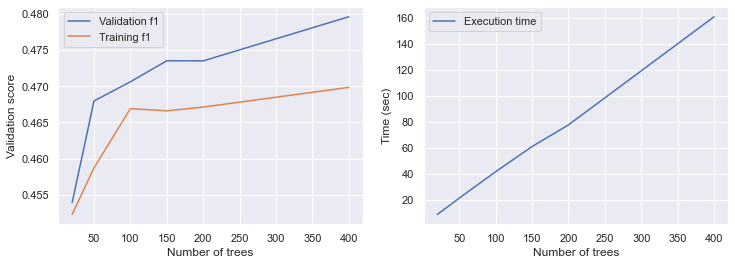

In [204]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(n_estimators, cv_scores, label='Validation f1')
plt.plot(n_estimators, train_scores, label='Training f1')
plt.xlabel('Number of trees')
plt.ylabel('Validation score')
plt.legend() 
plt.subplot(122)
plt.plot(n_estimators, exectime, label='Execution time')
plt.xlabel('Number of trees')
plt.ylabel('Time (sec)')
plt.legend()
plt.show()

In [205]:
#We said 200 because there is not a big change after 200 trees. 

In [206]:
model = RandomForestClassifier(n_estimators=200, random_state=seed)

param_grid = {'max_features': [0.2,0.3,0.4]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_search = GridSearchCV(model, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_search.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_search.score(X_train, y_train))
print('Test f1    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.1min finished



Best CV score: 0.477049 using {'max_features': 0.3}

0.475225 (0.013086) with: {'max_features': 0.2}
0.477049 (0.013641) with: {'max_features': 0.3}
0.475586 (0.010380) with: {'max_features': 0.4}

Training f1: 0.9987622369753573
Test f1    : 0.47525891829689293


In [232]:
model = RandomForestClassifier(n_estimators=200,max_features=0.3, random_state=seed)

param_grid = {'min_samples_leaf': [8,9]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_search = GridSearchCV(model, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_search.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_search.score(X_train, y_train))
print('Test f1    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished



Best CV score: 0.484138 using {'min_samples_leaf': 9}

0.480303 (0.014641) with: {'min_samples_leaf': 8}
0.484138 (0.010973) with: {'min_samples_leaf': 9}

Training f1: 0.5906348750359093
Test f1    : 0.4653494544382188


In [233]:
model = RandomForestClassifier(n_estimators=200,max_features=0.3,min_samples_leaf=9, random_state=seed)

param_grid = {'max_depth': [8,9,10]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_search = GridSearchCV(model, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_search.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_search.score(X_train, y_train))
print('Test f1    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished



Best CV score: 0.479360 using {'max_depth': 9}

0.476716 (0.007121) with: {'max_depth': 8}
0.479360 (0.008964) with: {'max_depth': 9}
0.479232 (0.011262) with: {'max_depth': 10}

Training f1: 0.530534907447894
Test f1    : 0.461217183770883


In [234]:
model = RandomForestClassifier(n_estimators=200,max_features=0.3,min_samples_leaf=9,max_depth=9, random_state=seed)

param_grid = {'min_samples_split': [2,3,4]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_search = GridSearchCV(model, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_search.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_search.score(X_train, y_train))
print('Test f1    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished



Best CV score: 0.479360 using {'min_samples_split': 2}

0.479360 (0.008964) with: {'min_samples_split': 2}
0.479360 (0.008964) with: {'min_samples_split': 3}
0.479360 (0.008964) with: {'min_samples_split': 4}

Training f1: 0.530534907447894
Test f1    : 0.461217183770883


In [235]:
#I used smoteenn and rerun the model because the data is imbalance.
pipeline_rnd = pipe_imb(steps=[('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                                ('classifier',   RandomForestClassifier(random_state=seed))])

param_grid = {"classifier__criterion"        : ['gini'],
              "classifier__min_samples_split": [ 2, 3],
              "classifier__max_features"     : [0.3,0.4],
              "classifier__max_depth"        : [ 8,9],
              "classifier__min_samples_leaf" : [ 8, 9],
              "classifier__n_estimators"     : [200],
              'sampler__sampling_strategy'   : [0.3, 0.4]}

kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_smot_rnd = GridSearchCV(estimator = pipeline_rnd, param_grid = param_grid, cv = kfold,verbose = 1,n_jobs = -1,scoring='f1')
grid_smot_rnd.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 16.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampler',
                                        SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all',
                                                                             n_jobs=None,
                                                                             n_neighbors=3,
                                                                             sampling_strategy='auto'),
                                                 n_jobs=None, random_state=42,
                                                 sampling_strategy='auto',
                                                 smote=None)),
                                       ('classifier',
                                        RandomForestClassifier(boot...
             iid='deprecated', n_jobs=-1,
             param_grid={'classifi

In [236]:
print('\nTraining f1:', grid_smot_rnd.score(X_train, y_train)) 
print('Test f1    :', grid_smot_rnd.score(X_test, y_test))


Training f1: 0.576143537490309
Test f1    : 0.5308419630796938


In [237]:
grid_smot_rnd.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 8,
 'classifier__max_features': 0.3,
 'classifier__min_samples_leaf': 9,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 200,
 'sampler__sampling_strategy': 0.3}

***Gradient Boosting Classifer***



In [214]:
modelGBM = GradientBoostingClassifier(random_state=seed)

param_grid = {'n_estimators': [150,200,250]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_GBM = GridSearchCV(modelGBM, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_GBM.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_GBM.score(X_train, y_train))
print('Test f1    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished



Best CV score: 0.483453 using {'n_estimators': 150}

0.483453 (0.006059) with: {'n_estimators': 150}
0.482971 (0.005139) with: {'n_estimators': 200}
0.481141 (0.007666) with: {'n_estimators': 250}

Training f1: 0.5100419014593267
Test f1    : 0.4670975323149237


In [215]:
modelGBM = GradientBoostingClassifier(n_estimators=200,random_state=seed)

param_grid = {'learning_rate': [0.01,0.1,0.2]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_GBM = GridSearchCV(modelGBM, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_GBM.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_GBM.score(X_train, y_train))
print('Test f1    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.9min finished



Best CV score: 0.482971 using {'learning_rate': 0.1}

0.459044 (0.011802) with: {'learning_rate': 0.01}
0.482971 (0.005139) with: {'learning_rate': 0.1}
0.476242 (0.008743) with: {'learning_rate': 0.2}

Training f1: 0.518721198156682
Test f1    : 0.4676850763807286


In [216]:
modelGBM = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,random_state=seed)

param_grid = {'subsample': [0.5,1,2]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_GBM = GridSearchCV(modelGBM, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_GBM.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_GBM.score(X_train, y_train))
print('Test f1    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished



Best CV score: 0.482971 using {'subsample': 1}

0.482705 (0.004696) with: {'subsample': 0.5}
0.482971 (0.005139) with: {'subsample': 1}
nan (nan) with: {'subsample': 2}

Training f1: 0.518721198156682
Test f1    : 0.4676850763807286


In [217]:
modelGBM = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,subsample=0.5,random_state=seed)

param_grid = {'min_samples_split': [2,3,5]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_GBM = GridSearchCV(modelGBM, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_GBM.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_GBM.score(X_train, y_train))
print('Test f1    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished



Best CV score: 0.484124 using {'min_samples_split': 5}

0.482705 (0.004696) with: {'min_samples_split': 2}
0.483632 (0.009319) with: {'min_samples_split': 3}
0.484124 (0.007007) with: {'min_samples_split': 5}

Training f1: 0.52
Test f1    : 0.46797309154723604


In [218]:
modelGBM = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,subsample=0.5,min_samples_split=2,random_state=seed)

param_grid = {'min_samples_leaf': [1,2,3]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_GBM = GridSearchCV(modelGBM, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_GBM.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_GBM.score(X_train, y_train))
print('Test f1    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   59.7s finished



Best CV score: 0.483695 using {'min_samples_leaf': 2}

0.482705 (0.004696) with: {'min_samples_leaf': 1}
0.483695 (0.007526) with: {'min_samples_leaf': 2}
0.483519 (0.007464) with: {'min_samples_leaf': 3}

Training f1: 0.5196487692529149
Test f1    : 0.46855805791167005


In [219]:
modelGBM = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,subsample=0.5,min_samples_split=2,min_samples_leaf=1,
                                      random_state=seed)

param_grid = {'max_depth': [3,4,5]}


kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_GBM = GridSearchCV(modelGBM, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_GBM.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_GBM.score(X_train, y_train))
print('Test f1    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished



Best CV score: 0.482705 using {'max_depth': 3}

0.482705 (0.004696) with: {'max_depth': 3}
0.477994 (0.008459) with: {'max_depth': 4}
0.475569 (0.011227) with: {'max_depth': 5}

Training f1: 0.5203042043334769
Test f1    : 0.46863145608403844


In [220]:
pipeline_GBM_ohe = pipe_imb(steps=[('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                                ('classifier',   GradientBoostingClassifier(random_state=seed))])

random_grid = {
    'classifier__n_estimators'     : [150],
    'classifier__learning_rate'    : [0.1],
    'classifier__subsample'        : [1],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf' : [4,5,6],
    'classifier__max_depth'        : [3,4],
    'sampler__sampling_strategy': [0.2, 0.3, 0.4]} 

kfold = StratifiedKFold(n_splits = 5, random_state = seed) # train/validation with the same ratio of classes
grid_gbm_ohe = GridSearchCV(pipeline_GBM_ohe, param_grid = random_grid, cv = kfold, verbose = 1, n_jobs = -1,scoring="f1")
grid_gbm_ohe.fit(X_train, y_train)
print('\nTraining f1:', grid_gbm_ohe.score(X_train, y_train))
print('Test f1    :', grid_gbm_ohe.score(X_test, y_test))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.8min finished



Training f1: 0.5635731591699146
Test f1    : 0.5323679727427598


In [221]:
grid_gbm_ohe.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3,
 'classifier__min_samples_leaf': 6,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 150,
 'classifier__subsample': 1,
 'sampler__sampling_strategy': 0.3}

In [97]:
#I tried all of the models before I did the education, marriage, and gender features one hot encoding,
#then I ran the models again after doing one hot encoding. The best result was after one hot encoding.
#The following result is the best result I got from my run before I did one hot encoding.

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as pipe_imb

pipeline_SMOT = pipe_imb(steps=[('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                                ('classifier',   GradientBoostingClassifier(random_state=seed))])

params = [{'classifier__n_estimators'      : [150,200,250], 
           'classifier__learning_rate'     : [0.1,0.2], 
           'classifier__subsample'         : [1,2,3],
           'classifier__min_samples_split' : [2,3,4],
           'classifier__min_samples_leaf'  : [3,4,5],
           'classifier__max_depth'         : [2,3,4],
           'sampler__sampling_strategy': [0.2, 0.3, 0.4]} ]

kfold = StratifiedKFold(n_splits = 5, random_state = seed) # train/validation with the same ratio of classes
grid_smote = GridSearchCV(pipeline_SMOT, param_grid = params, cv = kfold, verbose = 1, n_jobs = -1,scoring="f1")
grid_smote.fit(X_train, y_train)
print('\nTraining f1:', grid_smote.score(X_train, y_train))
print('Test f1    :', grid_smote.score(X_test, y_test))

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 239.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 254.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 345.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 428.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 478.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 500.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 531.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 570.1min
[Parallel(n_jobs=-1)]: Done 7290 out of 7290 | elapsed: 573.4min finished



Training f1: 0.5617438256174383
Test f1    : 0.550184162062615


In [98]:
grid_smote.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 150,
 'classifier__subsample': 1,
 'sampler__sampling_strategy': 0.3}

***XGBoost***



In [222]:
modelXGB = XGBClassifier(objective='binary:logistic', seed=seed)

param_grid = {'learning_rate': [0.2, 0.3, 0.4],
              'n_estimators' : [50, 100,150]}

kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_XG = GridSearchCV(modelXGB, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_XG.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_XG.best_score_, grid_XG.best_params_))
means = grid_XG.cv_results_['mean_test_score']
stds = grid_XG.cv_results_['std_test_score']
params = grid_XG.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_XG.score(X_train, y_train))
print('Test f1    :', grid_XG.score(X_test, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.5min finished



Best CV score: 0.482532 using {'learning_rate': 0.2, 'n_estimators': 50}

0.482532 (0.010110) with: {'learning_rate': 0.2, 'n_estimators': 50}
0.477349 (0.007687) with: {'learning_rate': 0.2, 'n_estimators': 100}
0.473781 (0.010069) with: {'learning_rate': 0.2, 'n_estimators': 150}
0.472509 (0.012088) with: {'learning_rate': 0.3, 'n_estimators': 50}
0.468498 (0.009916) with: {'learning_rate': 0.3, 'n_estimators': 100}
0.464566 (0.014610) with: {'learning_rate': 0.3, 'n_estimators': 150}
0.466676 (0.008605) with: {'learning_rate': 0.4, 'n_estimators': 50}
0.453843 (0.015741) with: {'learning_rate': 0.4, 'n_estimators': 100}
0.453961 (0.011403) with: {'learning_rate': 0.4, 'n_estimators': 150}

Training f1: 0.5737120022834309
Test f1    : 0.4652390730419477


In [223]:
modelXGB = XGBClassifier(objective='binary:logistic', seed=seed)

param_grid = {'max_depth'        : [5,6,7],
              'min_child_weight' : [1,2,3],
             'learning_rate': [0.1, 0.2],
             'n_estimators' : [50, 100]}

kfold = StratifiedKFold(n_splits = 5, random_state = seed) 
grid_XG = GridSearchCV(modelXGB, param_grid, scoring="f1", n_jobs=-1, cv=kfold,verbose=1)

grid_XG.fit(X_train, y_train)

# summarize results
print(); print("Best CV score: %f using %s\n" % (grid_XG.best_score_, grid_XG.best_params_))
means = grid_XG.cv_results_['mean_test_score']
stds = grid_XG.cv_results_['std_test_score']
params = grid_XG.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\nTraining f1:', grid_XG.score(X_train, y_train))
print('Test f1    :', grid_XG.score(X_test, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.6min finished



Best CV score: 0.486392 using {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}

0.480220 (0.009786) with: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}
0.482500 (0.008777) with: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
0.479757 (0.010737) with: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 50}
0.483168 (0.009593) with: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100}
0.479258 (0.009406) with: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 50}
0.485417 (0.009538) with: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}
0.479476 (0.008290) with: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50}
0.482780 (0.010132) with: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.479337 (0.00870

In [228]:
pipeline_XGB = pipe_imb(steps=[('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                                ('classifier',  XGBClassifier(objective='binary:logistic', seed=seed))])

param_grid = {'classifier__max_depth'        : [5,6],
              'classifier__min_child_weight' : [3],
             'classifier__learning_rate'     : [0.2],
             'classifier__n_estimators'      : [100],
             'sampler__sampling_strategy'    : [ 0.3,0.4],
             'classifier__gamma'                : [0],
             'classifier__subsample'            :[ 0.5,1],
              'classifier__colsample_bytree'    :[ 1,2],
             'classifier__reg_alpha'            :[1,2],
             'classifier__reg_lambda'           :[1,2]}

kfold = StratifiedKFold(n_splits = 5, random_state = seed) # train/validation with the same ratio of classes
grid_smote_xgb = GridSearchCV(pipeline_XGB, param_grid = param_grid, cv = kfold, verbose = 1, n_jobs = -1,scoring="f1")
grid_smote_xgb.fit(X_train, y_train)
print('\nTraining f1:', grid_smote_xgb.score(X_train, y_train))
print('Test f1    :', grid_smote_xgb.score(X_test, y_test))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 13.4min finished



Training f1: 0.6177957532861477
Test f1    : 0.5247258431615974


In [229]:
grid_smote_xgb.best_params_   

{'classifier__colsample_bytree': 1,
 'classifier__gamma': 0,
 'classifier__learning_rate': 0.2,
 'classifier__max_depth': 5,
 'classifier__min_child_weight': 3,
 'classifier__n_estimators': 100,
 'classifier__reg_alpha': 1,
 'classifier__reg_lambda': 1,
 'classifier__subsample': 1,
 'sampler__sampling_strategy': 0.3}

***Voting Classifer***

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score

clf1 = RandomForestClassifier(n_estimators=200,max_depth=8,max_features=0.5,min_samples_leaf=2,
                                             min_samples_split=3 ,random_state=seed)
clf2 = XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,min_child_weight=3,
                                   subsample=1,colsample_bytree=1,gamma=0,reg_alpha=0,reg_lambda=1,
                                   objective='binary:logistic', random_state=seed)
clf3 = GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,subsample=1,
                                                min_samples_split=2,max_depth=3,min_samples_leaf=4,
                                                random_state=seed)


eclf = VotingClassifier(estimators=[('rnd', clf1), ('XGB', clf2), ('GB', clf3)],
                        weights=[1, 1, 1],
                        voting='soft')

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

print('5-fold Cross Validation f1:')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest','XGBOOST', 'GBM', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=kfold,verbose=1)
    print("train f1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    y_pred=clf.predict(X_test)
    print("f1 test :%0.2f [%s] ", f1_score(y_test, y_pred, average=None),label)

5-fold Cross Validation f1:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


train f1: 0.46 (+/- 0.01) [Random Forest]
f1 test :%0.2f [%s]  [0.89378463 0.47335319] Random Forest


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


train f1: 0.46 (+/- 0.01) [XGBOOST]
f1 test :%0.2f [%s]  [0.89420115 0.48467058] XGBOOST


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   56.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


train f1: 0.46 (+/- 0.01) [GBM]
f1 test :%0.2f [%s]  [0.8942501  0.48732943] GBM


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


train f1: 0.47 (+/- 0.01) [Ensemble]
f1 test :%0.2f [%s]  [0.89383905 0.47984267] Ensemble


***Voting classifier did not give a very good result without sampling***